In [2]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import requests
import json
import gmaps

# Import API key
from config import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [3]:
file="../Resource/Shark_Articles.csv"
articles_df= pd.read_csv(file)
articles_df

,Article_name,Article_time,Year,Relevance (Y/N),Duplicate?,Activity,Article_category,Article_category_url,Article_url,Article_summary
0,Spearfisher circled by mako shark off Sydney b...,"5:12am Jul 19, 2021",2021,Y,N,Spearfishing,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/sydney-spear...,Footage from a drone shows the spearfisher app...
1,Jackass stunt ends in real shark attack,"3:01pm Jul 13, 2021",2021,Y,N,Misc,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/jackass-star...,A man has been seriously bitten by a shark whi...
2,Spearfishers attacked in shark feeding frenzy,"9:39pm Jul 12, 2021",2021,Y,N,Spearfishing,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/wa-news-spea...,Two divers have recounted a terrifying encount...
3,Parents of shark attack victim thank first res...,"9:47pm Jul 6, 2021",2021,Y,N,Misc,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/shark-attack...,Emergency services were called to Crescent Hea...
4,Researchers uncover 3000-year-old shark attack...,"2:48pm Jun 26, 2021",2021,N,N,Research/Politics/Recap,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/world/shark-attack-30...,Researchers have discovered what they say is t...
...,...,...,...,...,...,...,...,...,...,...
201,Surfer 'punched shark in face' mid-attack,"7:26pm Nov 14, 2017",2017,Y,N,Surfing,New South Wales,https://www.9news.com.au/new-south-wales,https://www.9news.com.au/national/shark-attack...,A British doctor has told 9NEWS he punched a s...
202,Surfer bitten by shark at NSW beach,"1:53pm Oct 28, 2017",2017,Y,N,Surfing,national,https://www.9news.com.au/national,https://www.9news.com.au/national/beach-closed...,The 31-year-old man was surfing at Birubi Beac...
203,Brother hauled teen over 4.5m great white in d...,"8:02am Oct 23, 2017",2017,Y,N,Misc,national,https://www.9news.com.au/national,https://www.9news.com.au/national/dragged-her-...,An Adelaide man bravely dragged his sister ove...
204,Shark latched onto diver's belly and 'wouldn't...,"12:39pm Sep 28, 2017",2017,N,N,International,USA,https://www.9news.com.au/usa,https://www.9news.com.au/world/shark-latches-o...,Video has emerged of the moment a man was forc...


In [5]:
# extract only articles between 2018 to 2020 (note that 2017 and 2021 do not have full year coverage)
articles_df=articles_df.loc[(articles_df["Year"]>2017)&(articles_df["Year"]<2021)]
articles_df

,Article_name,Article_time,Year,Relevance (Y/N),Duplicate?,Activity,Article_category,Article_category_url,Article_url,Article_summary
34,Drone operator spots school of 40 sharks at NS...,"3:44pm Dec 31, 2020",2020,N,N,Shark Spotting,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/nsw-sharks-d...,A drone has spotted a large school of sharks a...
35,Survivor tells of near-death experience after ...,"11:00am Dec 15, 2020",2020,N,N,Research/Politics/Recap,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/shark-attack...,David Pearson can still recall the moment he t...
36,Woman killed in rare shark attack on Caribbean...,"9:59am Dec 11, 2020",2020,N,N,Unknown,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/st-martin-re...,A fatal shark attack was reported in the Frenc...
37,Surfer didn't even see shark that took bite ou...,"9:28pm Dec 9, 2020",2020,Y,N,Surfing,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/western-aust...,Surfer Sam Heseltine is counting his lucky sta...
38,Shark attack was 'like being hit by a truck' r...,"7:57pm Dec 7, 2020",2020,Y,N,Surfing,sharks,https://www.9news.com.au/sharks,https://www.9news.com.au/national/shark-attack...,Paramedics who treated a South Australian surf...
...,...,...,...,...,...,...,...,...,...,...
195,Shark warning after boys 'injured' 3m from shore,"1:53pm Mar 15, 2018",2018,Y,N,Misc,beaches,https://www.9news.com.au/beaches,https://www.9news.com.au/national/shark-warnin...,A shark warning has been issued after two chil...
196,Sydney swimmer bitten by great white shark,"6:43pm Feb 24, 2018",2018,Y,N,Swimming,New South Wales,https://www.9news.com.au/new-south-wales,https://www.9news.com.au/national/sydney-shark...,Sydney lifeguards have closed La Perouse beach...
197,Shark attack on woman 'unusual',"2:06pm Feb 24, 2018",2018,Y,N,Swimming,beach,https://www.9news.com.au/beach,https://www.9news.com.au/national/woman-left-w...,The Sydney beach has had no shark attacks in a...
198,Surfer mauled by shark set to realise Paralymp...,"10:03pm Feb 20, 2018",2018,N,N,Research/Politics/Recap,winter olympics,https://www.9news.com.au/winter-olympics,https://www.9news.com.au/national/sean-pollard...,A surfer who lost an arm and a hand in shark a...


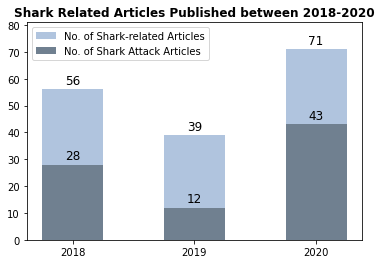

In [84]:
#1. create line chart to visualize number of articles relating to sharks are published between 2018 to 2020
#2. create a line chart to visualize number of relevant articles to shark attacks published in 2018-2020
year_df=pd.DataFrame(articles_df['Year'].value_counts())
year_df=year_df.sort_index()
relevant_df=pd.DataFrame(articles_df['Year'].loc[articles_df['Relevance (Y/N)']=='Y'].value_counts())
relevant_df=relevant_df.sort_index()

# create bar chart
fig, ax = plt.subplots()

ax.set_title("Shark Related Articles Published between 2018-2020",fontweight='bold')
ax.set_xticks(year_df.index)
ax.set_ylim(0, year_df['Year'].max()+10)
p1 = ax.bar(year_df.index,year_df["Year"],label="No. of Shark-related Articles",color="lightsteelblue",width=0.5 )
p2 = ax.bar(relevant_df.index,relevant_df["Year"], label="No. of Shark Attack Articles",color="slategray", width=0.5)
ax.legend()

# For each patch (basically each rectangle within the bar), add a label.
y_offset=2
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='black',
      size=12
  )



0